In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

for att in ['axes.labelsize', 'axes.titlesize', 'legend.fontsize',
            'legend.fontsize', 'xtick.labelsize', 'ytick.labelsize']:
    plt.rcParams[att] = 13
plt.rcParams['image.cmap'] = 'gray'
plt.set_cmap('jet')
from altaipony.ffd import generate_random_power_law_distribution, FFD

<Figure size 432x288 with 0 Axes>

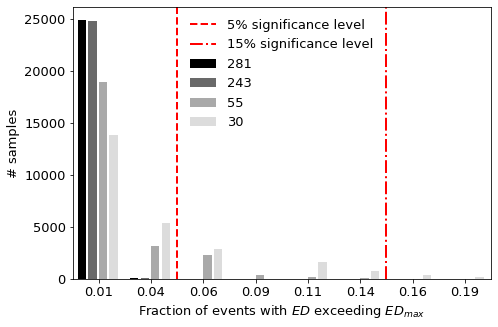

In [17]:

alpha = 2.
emin = 10.
plt.figure(figsize=(7.5,5))
bins = np.linspace(0,.2,9)
xcds = []
lens = [281,243,55,30]
for l, size in enumerate(lens):
    
    exceeds = []
    for j in range(50):
        pwl = generate_random_power_law_distribution(emin, 1e9, -alpha + 1, size=size)
        maxdata = np.max(pwl)
        maxdata

        for i in range(500):
            testpwl = generate_random_power_law_distribution(emin, 1e9, -alpha + 1, size=size)
            exceed = len(np.where(testpwl > maxdata)[0]) / size
            exceeds.append(exceed)
    xcds.append(exceeds)
plt.set_cmap('gray')
xcds = np.array(xcds)
hist, bins, bla = plt.hist(xcds.T, bins=bins, width=.004, color=["k","dimgrey","darkgrey","gainsboro"],
            linewidth=1.5, label=lens, )
plt.xlim(0,.2)
tks = np.round((np.array(bins)[:-1] +  np.array(bins)[1:]) / 2.,5)
plt.xticks(tks, labels=np.round(tks,2).astype(str))
# print(tks)
# plt.xtick_labels(tks)
plt.axvline(0.05, linestyle="dashed",color="r", linewidth=2, label=r"5% significance level")
plt.axvline(0.15, linestyle="-.",color="r", linewidth=2, label=r"15% significance level")
plt.legend(frameon=False)
plt.xlabel(r"Fraction of events with $ED$ exceeding $ED_{max}$")
plt.ylabel("# samples")
plt.savefig(f"../plots/exceedance_test_alpha{alpha}_emin{emin}.png", dpi=300)
# testing 50 samples with exponent 2. for each sample size

In [ ]:
plt.xticks

In [ ]:
ffd = FFD(f=pd.DataFrame({"ed_rec":pwl}))
ffd.alpha = 2.
ffd.ed_and_freq();

In [ ]:
ffd.is_powerlaw_truncated()

In [ ]:
bins